In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9668161434977578

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm


array([[965,   0],
       [ 37, 113]])

In [ ]:
new_email = ["Congratulations! You have won a free gift card. Click now"]
new_email_tfidf = vectorizer.transform(new_email)

prediction = model.predict(new_email_tfidf)

if prediction[0] == 1:
    print("Spam Email 🚫")
else:
    print("Not Spam Email ✅")


Spam Email 🚫


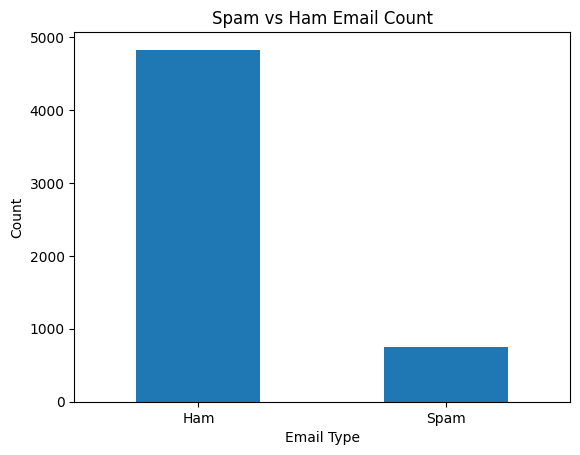

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.xticks([0,1], ['Ham', 'Spam'], rotation=0)
plt.title("Spam vs Ham Email Count")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()


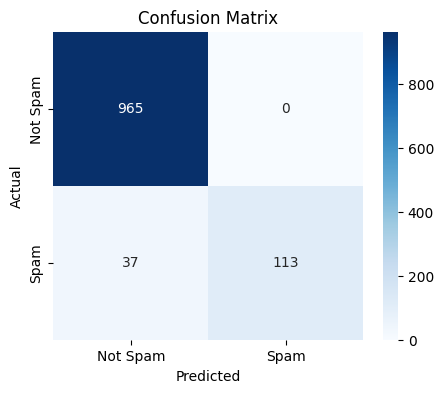

In [ ]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


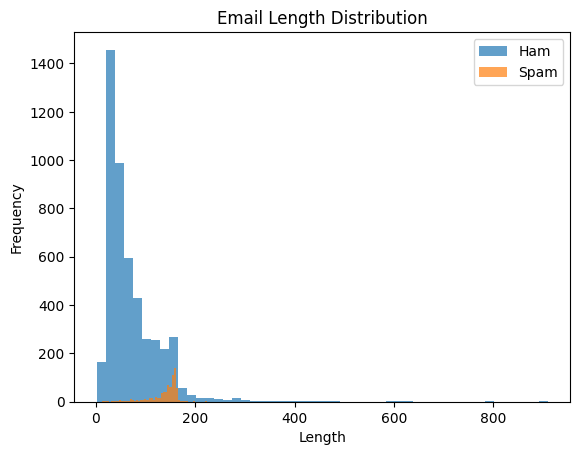

In [ ]:
df['email_length'] = df['message'].apply(len)

plt.hist(df[df['label']==0]['email_length'], bins=50, alpha=0.7, label='Ham')
plt.hist(df[df['label']==1]['email_length'], bins=50, alpha=0.7, label='Spam')
plt.legend()
plt.title("Email Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


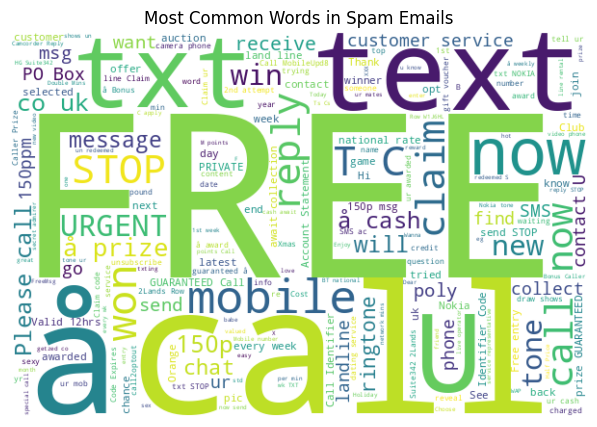

In [ ]:
from wordcloud import WordCloud

# Spam Messages
spam_words = ' '.join(df[df['label']==1]['message'])
spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)

plt.figure(figsize=(8,5))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Spam Emails")
plt.show()


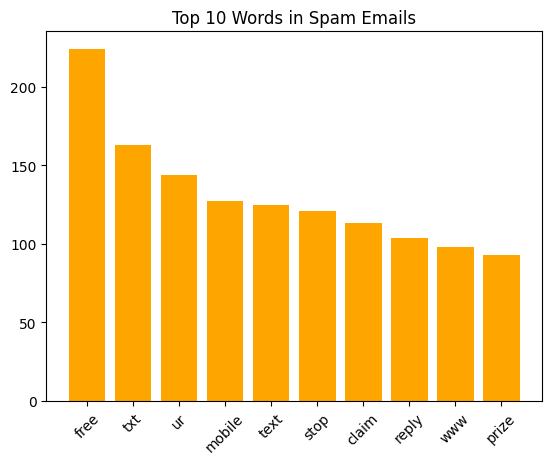

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df[df['label']==1]['message'])
sum_words = X_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]

words, freq = zip(*words_freq)
plt.bar(words, freq, color='orange')
plt.title("Top 10 Words in Spam Emails")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

